# Prerequisites

Please make sure to follow these steps to start using TimeGEN: 

* Register for a valid Azure account with subscription 
* Make sure you have access to [Azure AI Studio](https://learn.microsoft.com/en-us/azure/ai-studio/what-is-ai-studio?tabs=home)
* Create a project and resource group
* Select `TimeGEN-1`.

    > Notice that some models may not be available in all the regions in Azure AI and Azure Machine Learning. On those cases, you can create a workspace or project in the region where the models are available and then consume it with a connection from a different one. To learn more about using connections see [Consume models with connections](https://learn.microsoft.com/en-us/azure/ai-studio/how-to/deployments-connections)

* Deploy with "Pay-as-you-go"

Once deployed successfully, you should be assigned for an API endpoint and a security key for inference.

To complete this tutorial, you will need to:

* Install `nixtla` and `pandas`:

    ```bash
    pip install nixtla pandas
    ```

In [1]:
!pip install nixtla pandas python-dotenv matplotlib

Defaulting to user installation because normal site-packages is not writeable

[notice] A new release of pip is available: 23.0.1 -> 24.0
[notice] To update, run: pip install --upgrade pip


# Quickstart

To forecast with TimeGEN, simply call the `forecast` method, making sure that you pass your DataFrame, and specify your target and time column names. Then you can plot the predictions using the `plot` method.

In [2]:
import pandas as pd
from nixtla import NixtlaClient

In [3]:
# import load_env
from dotenv import load_dotenv
from os import environ as env

load_dotenv()

True

In [4]:
# Instantiate the Nixtla Client
base_url = env.get("NIXTLA_BASE_URL")
api_key = env.get("NIXTLA_API_KEY")
if not api_key:
    raise Exception("A key should be provided to invoke the endpoint")

nixtla_client = NixtlaClient(
    base_url=base_url,
    api_key=api_key,
)

https://TimeGEN-1-mavwe.westus3.models.ai.azure.com/


In [8]:
# Read the data
df = pd.read_csv(
    "https://raw.githubusercontent.com/Nixtla/transfer-learning-time-series/main/datasets/air_passengers.csv"
)
df.tail()

,timestamp,value
139,1960-08-01,606
140,1960-09-01,508
141,1960-10-01,461
142,1960-11-01,390
143,1960-12-01,432


In [6]:
# Forecast
forecast_df = nixtla_client.forecast(
    df=df,
    h=12,
    time_col="timestamp",
    target_col="value",
)

INFO:nixtla.nixtla_client:Validating inputs...
INFO:nixtla.nixtla_client:Preprocessing dataframes...
INFO:nixtla.nixtla_client:Inferred freq: MS
INFO:nixtla.nixtla_client:Restricting input...
INFO:nixtla.nixtla_client:Calling Forecast Endpoint...


INFO:matplotlib.font_manager:generated new fontManager


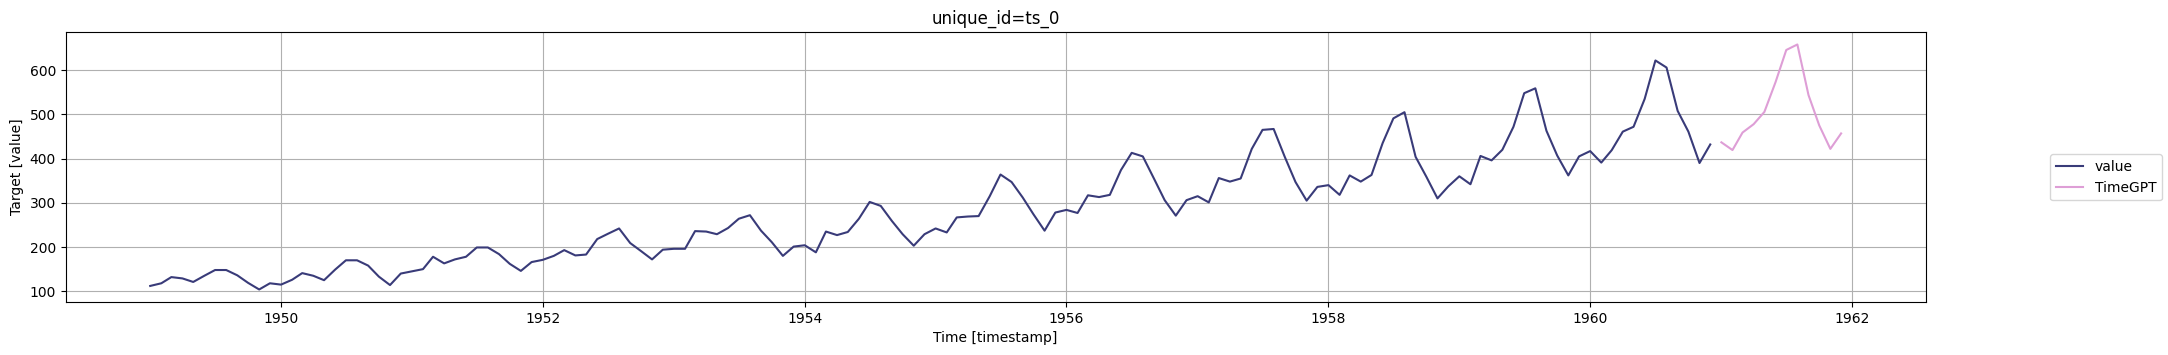

In [7]:
# Plot predictions
nixtla_client.plot(
    df=df, forecasts_df=forecast_df, time_col="timestamp", target_col="value"
)